PROJECT TITLE

Sales Prediction using Advertising Dataset


PROBLEM STATEMENT

This project aims to build a machine learning model to predict product sales based on advertising expenditure across different media channels such as TV, Radio, and Newspaper.

Businesses invest in multiple advertising platforms, but it is important to understand which channels contribute most to sales. The objective of this project is to analyze the relationship between advertising budgets and sales, and develop a predictive model that can estimate future sales based on marketing spend.

This is a regression problem where the target variable (Sales) is continuous.

MODELS USED

• Linear Regression
• Random Forest Regressor

In [2]:
from google.colab import files
uploaded=files.upload()

Saving advertising.csv to advertising.csv


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [7]:
df=pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [9]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [10]:
X=df[['TV','Radio','Newspaper']]
y=df['Sales']

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [13]:
y_pred=model.predict(X_test)

In [14]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 1.2748262109549338
MSE: 2.9077569102710896
R2 Score: 0.9059011844150826


In [15]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


           Coefficient
TV            0.054509
Radio         0.100945
Newspaper     0.004337


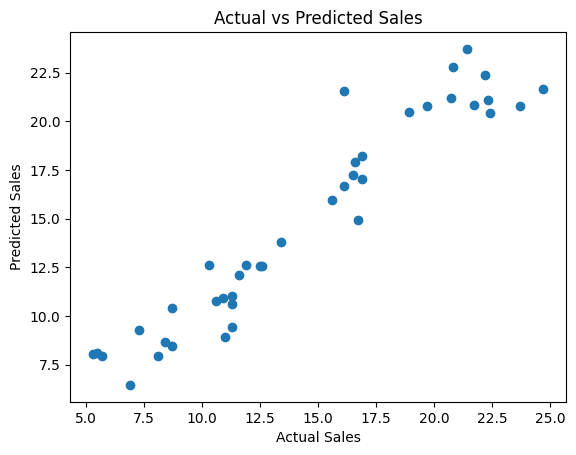

In [16]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()


In [18]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

print("Random Forest R2:", r2_score(y_test, rf_pred))


Random Forest R2: 0.9534827934927883


In [19]:
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(importance)


     Feature  Importance
0         TV    0.845355
1      Radio    0.136642
2  Newspaper    0.018003


RESULTS

• Linear Regression R² Score ≈ 0.90
• Random Forest R² Score ≈ 0.95

Random Forest performed better and was selected as the final model.

CONCLUSION

The Random Forest model achieved an R² score of approximately 0.95, indicating that it explains 95% of the variance in sales.

Feature importance analysis showed that:

• TV advertising has the highest impact on sales
• Radio advertising has moderate impact
• Newspaper advertising has minimal impact

This suggests that businesses should prioritize TV and Radio marketing channels to maximize sales performance.

The project successfully demonstrates the complete machine learning workflow including data exploration, model training, evaluation, and interpretation.